# Importar las librerías


In [ ]:
import pandas
import numpy as np
from sklearn.manifold import MDS
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import random

# Cargar los datos en un Dataframe

In [ ]:
df = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/ML_Peliculas (respuestas).xlsx')
df

,idUsuario,CF [Spider-man: lejos de casa],CF [Doctor Strange],CF [El Origen],CF [Tortugas Ninja 2: fuera de las sombras],CF [Arrival (La llegada)],CF [Interestellar],CF [Blade Runner 2049],CF [Looper: Asesinos del futuro],CF [Artificial Intelligence],CF [Ready Player One: comienza el juego],CF [The Martian (Misión rescate)],CF [Ex machina],T [El Conjuro],T [Eso],T [The Witch (La bruja)],T [Midsommar: el terror no espera la noche],T [Hereditary (El legado del diablo)],T [The nun (La monja)],T [Annabelle],T [Insidious (La noche del demonio)],T [El aro],T [Friday the 13th (Viernes 13)],D [The Godfather (El padrino)],D [Hachi: A Dog's Tale (Siempre a tu lado)],D [The Pursuit of Happyness (En busca de la felicidad)],D [Intouchables (Amigos Intocables)],D [La vida es bella],D [Nocturnal animals (Animales nocturnos)],D [The devil all the time (El diablo a todas horas)],D [Dunkirk (Dunkerque)],D [Ford vs Ferrari (Contra lo imposible)],D [Parasite (Parásitos)],D [Whiplash: música y obsesión],D [Marriage story (Historia de un matrimonio)],CR [Un principe en Nueva York],CR [How to Lose a Guy in 10 Days (Como perder a un hombre en 10 días)],CR [Cásese quien pueda],CR [About Time (Cuestión de tiempo)],CR [Yesterday],CR [500 Days of Summer (500 días con ella)],CR [Crazy stupid love (Loco y estúpido amor)],CR [Forgetting Sarah Marshall (¿Cómo sobrevivir a mi ex?)],CR [This is 40 (Si fuera fácil)],CR [10 Things I Hate About You (10 cosas que odio de ti)],"I [Monsters, Inc.]",I [Toy Story 4],I [La Era de Hielo],I [Aladdin],I [Kung fu Panda ],I [Vecinos Invasores],I [Soul],I [Grandes Héroes],I [Frozen],I [Los increíbles]
0,0,5,6,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,-1,5,5,5,5,-1,-1,-1,-1,5,-1,5,5,5,5,-1,-1,-1,-1,-1,-1,5,5,5,5,6,5,3,5,3,3,3
1,1,5,2,5,4,4,4,1,4,4,4,4,4,3,1,3,1,1,1,3,1,3,4,3,5,5,5,5,5,-1,-1,5,-1,-1,-1,5,3,3,5,3,4,4,4,-1,-1,5,5,5,5,2,3,4,4,4,3
2,2,5,6,4,4,4,6,-1,-1,-1,-1,-1,5,5,6,-1,-1,-1,6,6,4,-1,5,-1,-1,6,1,6,-1,6,6,-1,-1,-1,-1,6,6,6,6,-1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,3,2,5,6,1,3,5,6,3,2,2,3,5,3,3,6,2,6,2,2,6,3,5,6,5,3,3,5,6,5,5,3,6,6,6,2,2,2,2,2,3,2,3,2,3,5,2,3,2,3,5,2,3,2,6
4,4,5,6,4,1,-1,6,-1,-1,-1,5,5,4,5,5,-1,4,6,5,5,-1,5,3,4,-1,5,5,4,-1,-1,4,-1,4,-1,-1,-1,3,3,-1,-1,5,1,1,1,5,6,6,5,1,5,5,4,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,4,4,5,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,4,1,4,5,3,4,1,4,4,2,4,1,4,5,1,4,3,3,1,1,4,6,5,5,1,5,3,1,3,1,3,5
93,93,5,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,6,5,5,6,-1,-1,6,6,-1,6,-1,-1,6,-1,-1,-1,5,-1,3,3,-1,-1,3,-1,3,-1,3,5,6,5,5,5,5,5,-1,6,5
94,94,-1,5,3,-1,6,-1,-1,-1,-1,-1,5,-1,3,3,5,-1,-1,3,3,5,-1,1,-1,-1,5,-1,6,-1,-1,6,-1,-1,-1,-1,-1,-1,-1,6,-1,1,-1,-1,-1,-1,3,-1,6,3,5,2,3,3,3,3
95,95,5,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,-1,-1,3,3,-1,-1,-1,-1,3,5,3,3,-1,-1,-1,2,2,5,-1,-1,5,-1,6,-1,5,5,3,-1,5,5,-1,3,5,3,3,5,5,3,5


# Transponer los datos para manipularlos después

In [ ]:
values = df.values[:,1:]
columnsD = df.columns[1:]
dfmf = pandas.DataFrame(values,index=np.arange(0,97),columns=columnsD)
dfmf = dfmf.transpose()
dfmf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
CF [Spider-man: lejos de casa],5,5,5,2,5,3,5,3,-1,5,-1,5,3,-1,-1,4,3,5,4,5,5,5,5,6,-1,5,5,3,5,3,6,3,-1,3,5,3,3,3,6,5,...,-1,1,3,3,5,3,3,3,3,5,5,4,-1,5,-1,5,-1,3,3,-1,5,5,5,5,5,-1,4,-1,-1,3,-1,5,5,3,4,4,5,-1,5,3
CF [Doctor Strange],6,2,6,5,6,3,6,5,5,5,-1,3,3,5,-1,5,3,5,5,5,5,5,5,-1,-1,6,-1,5,5,5,6,6,3,4,6,-1,5,-1,5,3,...,5,-1,3,-1,6,5,5,-1,3,4,6,-1,4,3,-1,5,-1,-1,4,-1,5,4,5,5,5,-1,4,-1,-1,5,3,-1,6,4,5,4,5,5,5,-1
CF [El Origen],6,5,4,6,4,2,5,6,3,6,-1,5,4,3,-1,-1,-1,-1,4,-1,6,6,-1,-1,3,5,-1,4,-1,6,4,4,5,-1,3,-1,4,-1,5,5,...,6,4,5,-1,-1,5,4,5,5,-1,4,-1,4,5,5,4,6,-1,4,5,5,-1,-1,4,3,-1,4,-1,-1,4,5,-1,5,3,-1,5,-1,3,-1,-1
CF [Tortugas Ninja 2: fuera de las sombras],-1,4,4,1,1,3,2,3,-1,4,-1,1,2,-1,-1,1,-1,6,4,-1,1,3,-1,-1,-1,1,-1,4,3,-1,1,1,-1,2,3,-1,1,6,1,3,...,-1,1,-1,1,2,1,3,-1,-1,-1,4,4,1,3,3,4,1,-1,1,-1,1,1,-1,3,6,-1,4,5,-1,3,-1,-1,3,-1,1,4,-1,-1,-1,-1
CF [Arrival (La llegada)],-1,4,4,3,-1,4,4,-1,6,-1,-1,6,-1,1,-1,1,-1,-1,-1,2,5,-1,-1,-1,5,4,-1,4,-1,5,-1,-1,-1,-1,-1,-1,-1,1,-1,5,...,-1,-1,4,-1,-1,3,4,5,-1,-1,4,-1,4,-1,-1,4,1,-1,1,-1,4,-1,-1,4,2,-1,4,-1,-1,4,-1,-1,4,-1,1,4,-1,6,-1,-1
CF [Interestellar],-1,4,6,5,6,5,4,6,6,5,-1,5,5,5,-1,3,-1,6,-1,-1,6,6,-1,3,3,3,6,4,-1,6,4,3,5,1,4,5,4,3,4,6,...,6,-1,5,1,4,6,4,2,3,-1,4,-1,4,-1,-1,4,1,-1,4,5,3,-1,-1,4,1,-1,4,-1,-1,4,1,-1,4,-1,3,4,-1,-1,-1,-1
CF [Blade Runner 2049],-1,1,-1,6,-1,1,4,-1,4,4,-1,5,5,-1,-1,1,2,-1,-1,5,4,5,-1,2,-1,4,-1,1,-1,2,-1,-1,-1,-1,4,4,-1,1,-1,4,...,-1,-1,4,3,-1,4,4,6,-1,4,4,-1,4,-1,-1,-1,-1,-1,-1,-1,4,1,-1,4,4,-1,4,-1,-1,4,2,-1,1,1,1,4,-1,-1,-1,-1
CF [Looper: Asesinos del futuro],-1,4,-1,3,-1,1,4,-1,-1,-1,-1,5,-1,-1,-1,4,-1,-1,-1,-1,3,5,-1,-1,-1,3,-1,1,-1,3,-1,5,5,-1,-1,4,-1,1,4,6,...,-1,-1,-1,-1,-1,-1,4,-1,-1,2,4,4,4,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,4,-1,-1,4,-1,-1,1,1,4,4,-1,-1,-1,-1
CF [Artificial Intelligence],-1,4,-1,2,-1,4,4,-1,6,-1,-1,5,4,6,-1,3,-1,5,-1,-1,4,3,-1,-1,-1,4,-1,4,-1,6,-1,5,-1,4,-1,4,3,4,-1,4,...,-1,4,-1,-1,4,-1,4,-1,3,3,4,4,-1,5,-1,-1,-1,-1,-1,-1,1,-1,-1,4,5,5,4,-1,5,4,3,-1,3,1,3,4,-1,-1,-1,-1
CF [Ready Player One: comienza el juego],-1,4,-1,2,5,5,5,3,6,3,-1,6,3,3,-1,2,5,6,-1,-1,5,5,-1,-1,-1,5,5,5,6,6,5,4,-1,4,3,5,6,1,-1,3,...,-1,-1,5,-1,3,3,4,2,-1,3,4,-1,4,6,-1,-1,-1,-1,-1,-1,1,1,-1,-1,3,-1,4,-1,-1,4,-1,-1,4,1,2,4,-1,-1,-1,-1


In [ ]:
dfmf.shape
nmovies = dfmf.shape[0]
nusers = dfmf.shape[1]
print(nmovies,nusers)

54 97


# Ordenar las películas de "más vistas" a "menos vistas"

In [ ]:
moviesEval = np.zeros((nmovies))
usersEval = np.zeros((nusers))
for i in range(nmovies):
    moviesEval[i] =  np.sum(dfmf.values[i,:]!=-1)
for i in range(nusers):
    usersEval[i] = np.sum(dfmf.values[:,i]!=-1)
idxMovies = np.argsort(moviesEval)

idxUsers = np.argsort(usersEval)

print(idxMovies)
print(idxUsers)

[42 28 38  7 34 27  4 30  8 37  6 11 33 29 41 16 10 15 40 36  9 32 35 31
  3 22 14  2 39 21 43 25  5 20 19  1 17 23  0 49 26 51 50 24 18 13 12 45
 48 52 47 46 53 44]
[96 14 24 28 36 10 19  8 26  7 84 88 18 71 94 23 16 22 93 79 95 55 85 82
 30 40 48 73 45 67 72 34 35 78 74 76 58 60 54 17 12  0 57 32 42 90 64 13
 33 29 68  2 56 49 52 46  4 43 59 38 62 31 51 50 87 65 61 66  9 44 81 69
 70  1 77 27 75 41 37 80 21 15 91 20  5 25 92 89 86 39 83  6 11 53 47  3
 63]


In [ ]:
top50data = dfmf.values[idxMovies,:]
top50data = top50data[:,idxUsers]



In [ ]:
top50movies = pandas.DataFrame(top50data,index = dfmf.index[idxMovies],columns=idxUsers)

top50movies.to_csv('/content/drive/MyDrive/Colab Notebooks/top50movies.csv')

In [ ]:
dfTop50 = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/top50movies.csv')
dfTop50

,Unnamed: 0,96,14,24,28,36,10,19,8,26,7,84,88,18,71,94,23,16,22,93,79,95,55,85,82,30,40,48,73,45,67,72,34,35,78,74,76,58,60,54,...,43,59,38,62,31,51,50,87,65,61,66,9,44,81,69,70,1,77,27,75,41,37,80,21,15,91,20,5,25,92,89,86,39,83,6,11,53,47,3,63
0,CR [This is 40 (Si fuera fácil)],-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,-1,2,3,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,3,1,-1,4,5,3,-1,-1,1,4,-1,4,2,4,5,5,1,1,5,4,6,1,3,5,4,3,1,5,2,1
1,D [The devil all the time (El diablo a todas h...,-1,-1,-1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,5,-1,-1,-1,5,-1,-1,6,4,4,4,3,-1,-1,-1,4,4,4,4,4,3,3,6,4,4,1,5,1,1,4,4,4,3,4,5,1
2,CR [Yesterday],-1,5,-1,-1,3,-1,-1,-1,-1,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,3,-1,4,-1,-1,5,6,-1,4,3,1,-1,4,-1,2,3,-1,4,4,4,-1,5,6,5,5,4,4,5,3,6,1,3,4,3,1,4,4,2,1
3,CF [Looper: Asesinos del futuro],-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,4,-1,-1,4,1,-1,-1,-1,-1,-1,...,3,-1,4,-1,5,3,4,-1,-1,-1,2,-1,4,1,4,-1,4,1,1,-1,3,1,-1,5,4,4,3,1,3,4,1,4,6,4,4,5,4,4,3,4
4,CR [Un principe en Nueva York],-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,4,3,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,2,-1,3,-1,-1,...,-1,-1,-1,4,3,6,-1,5,-1,4,-1,1,-1,5,5,3,5,-1,5,4,3,2,-1,5,3,3,1,1,5,4,6,1,4,4,4,1,4,4,2,1
5,D [Nocturnal animals (Animales nocturnos)],-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,-1,5,-1,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,...,-1,-1,5,-1,5,-1,-1,2,6,4,3,-1,3,3,6,3,5,2,5,4,4,1,4,6,4,4,-1,1,4,4,6,4,4,4,4,4,4,4,6,4
6,CF [Arrival (La llegada)],-1,-1,5,-1,-1,-1,2,6,-1,-1,-1,-1,-1,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,1,3,4,4,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,4,-1,3,-1,-1,4,-1,-1,-1,-1,-1,1,2,4,-1,4,4,4,1,-1,1,4,-1,1,1,5,4,4,4,4,4,5,4,4,6,6,4,3,4
7,D [Ford vs Ferrari (Contra lo imposible)],-1,-1,-1,-1,-1,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,-1,-1,6,-1,-1,6,3,-1,-1,-1,-1,5,-1,-1,3,-1,4,...,3,5,4,-1,-1,-1,5,3,5,4,-1,5,5,3,-1,-1,5,-1,-1,4,4,1,1,5,5,5,4,4,4,4,4,4,5,4,4,4,3,4,3,4
8,CF [Artificial Intelligence],-1,-1,-1,-1,3,-1,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,5,5,-1,-1,4,-1,-1,4,-1,-1,4,-1,-1,-1,4,-1,-1,...,4,-1,-1,-1,5,-1,-1,3,3,4,3,-1,3,5,-1,5,4,1,4,-1,3,4,4,3,3,3,4,4,4,4,3,4,4,4,4,5,4,4,2,4
9,CR [About Time (Cuestión de tiempo)],-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,-1,-1,6,-1,-1,6,-1,-1,-1,-1,-1,1,-1,-1,-1,3,-1,4,-1,2,-1,-1,-1,-1,...,6,-1,3,6,-1,5,5,6,6,5,3,1,-1,4,4,3,5,3,4,4,6,-1,5,5,5,5,6,1,6,4,6,1,6,4,4,1,6,4,2,1


# Calcular distancia entre las películas

In [ ]:
nmovies,_ = dfTop50.values.shape
names = dfTop50.values[:,0]
evaluations = dfTop50.values[:,1:]


In [ ]:
# Calcular las distancias entre películas
def movies_distance( m1, m2):
    idx = np.logical_and( m1!=-1, m2!=-1)
    m1 = m1[idx]
    m2 = m2[idx]
    return np.mean(np.abs(m1 - m2))

D = np.zeros((nmovies,nmovies))
for i in range(nmovies):
    for j in range(i+1,nmovies):
        mi = evaluations[i,:]
        mj = evaluations[j,:]
        D[i,j] = D[j,i] = movies_distance( mi,mj )


dfdist = pandas.DataFrame(D,index=names,columns=names)
dfdist.to_csv('/content/drive/MyDrive/Colab Notebooks/dist_movies.csv')
dfdist

,CR [This is 40 (Si fuera fácil)],D [The devil all the time (El diablo a todas horas)],CR [Yesterday],CF [Looper: Asesinos del futuro],CR [Un principe en Nueva York],D [Nocturnal animals (Animales nocturnos)],CF [Arrival (La llegada)],D [Ford vs Ferrari (Contra lo imposible)],CF [Artificial Intelligence],CR [About Time (Cuestión de tiempo)],CF [Blade Runner 2049],CF [Ex machina],D [Marriage story (Historia de un matrimonio)],D [Dunkirk (Dunkerque)],CR [Forgetting Sarah Marshall (¿Cómo sobrevivir a mi ex?)],T [Hereditary (El legado del diablo)],CF [The Martian (Misión rescate)],T [Midsommar: el terror no espera la noche],CR [Crazy stupid love (Loco y estúpido amor)],CR [Cásese quien pueda],CF [Ready Player One: comienza el juego],D [Whiplash: música y obsesión],CR [How to Lose a Guy in 10 Days (Como perder a un hombre en 10 días)],D [Parasite (Parásitos)],CF [Tortugas Ninja 2: fuera de las sombras],D [The Godfather (El padrino)],T [The Witch (La bruja)],CF [El Origen],CR [500 Days of Summer (500 días con ella)],T [Friday the 13th (Viernes 13)],CR [10 Things I Hate About You (10 cosas que odio de ti)],D [Intouchables (Amigos Intocables)],CF [Interestellar],T [El aro],T [Insidious (La noche del demonio)],CF [Doctor Strange],T [The nun (La monja)],D [Hachi: A Dog's Tale (Siempre a tu lado)],CF [Spider-man: lejos de casa],I [Vecinos Invasores],D [La vida es bella],I [Grandes Héroes],I [Soul],D [The Pursuit of Happyness (En busca de la felicidad)],T [Annabelle],T [Eso],T [El Conjuro],I [Toy Story 4],I [Kung fu Panda ],I [Frozen],I [Aladdin],I [La Era de Hielo],I [Los increíbles],"I [Monsters, Inc.]"
CR [This is 40 (Si fuera fácil)],0.000000,1.448276,1.074074,1.640000,0.740741,1.461538,2.280000,1.730769,1.555556,1.064516,1.962963,2.185185,1.481481,1.903226,0.777778,2.034483,2.074074,2.241379,1.194444,0.666667,2.103448,1.821429,1.083333,2.566667,1.677419,2.033333,1.571429,2.068966,1.085714,1.941176,1.432432,2.030303,2.121212,1.676471,2.125000,1.575758,1.428571,1.935484,1.571429,2.088235,2.058824,1.916667,1.843750,2.142857,1.527778,1.888889,1.305556,1.945946,2.166667,1.447368,1.486486,2.189189,2.342105,2.342105
D [The devil all the time (El diablo a todas horas)],1.448276,0.000000,1.185185,1.680000,1.392857,1.172414,1.607143,1.322581,1.142857,1.533333,1.642857,1.413793,1.066667,1.242424,1.357143,1.133333,1.310345,1.187500,1.303030,1.600000,1.548387,1.187500,1.517241,1.468750,2.028571,1.300000,1.033333,1.242424,1.151515,1.588235,1.529412,1.696970,1.285714,1.558824,1.705882,1.228571,1.542857,1.515152,1.243243,1.314286,1.352941,1.428571,1.222222,1.257143,1.783784,1.410256,1.583333,1.789474,1.777778,1.837838,1.615385,1.538462,1.775000,1.675000
CR [Yesterday],1.074074,1.185185,0.000000,1.640000,0.777778,1.344828,1.851852,1.387097,1.214286,0.882353,2.000000,1.633333,1.266667,1.777778,1.000000,1.843750,1.379310,1.848485,1.093750,1.114286,1.466667,1.548387,1.093750,2.032258,1.937500,1.468750,1.441176,1.580645,1.000000,1.588235,1.057143,1.257143,1.852941,1.527778,1.942857,1.257143,1.771429,1.513514,1.205882,1.600000,1.342857,1.771429,1.558824,1.405405,1.605263,1.743590,1.710526,1.638889,1.842105,1.571429,1.666667,1.775000,1.750000,1.700000
CF [Looper: Asesinos del futuro],1.640000,1.680000,1.640000,0.000000,1.555556,0.964286,1.321429,1.103448,1.000000,1.606061,0.882353,0.857143,1.428571,0.793103,1.687500,1.657143,0.906250,1.454545,1.666667,1.875000,1.135135,1.375000,1.906250,1.531250,1.771429,1.303030,1.735294,1.406250,1.157895,1.542857,1.852941,1.555556,1.270270,1.324324,1.666667,1.783784,1.837838,1.820513,1.315789,1.805556,1.657895,1.794872,1.447368,1.342105,1.421053,1.405405,1.472222,1.650000,1.825000,1.717949,1.710526,1.878049,2.121951,2.048780
CR [Un principe en Nueva York],0.740741,1.392857,0.777778,1.555556,0.000000,1.000000,1.880000,1.370370,1.333333,0.818182,1.888889,1.484848,1.576923,1.400000,1.218750,2.281250,1.517241,2.121212,1.451613,1.111111,1.419355,1.678571,0.942857,1.928571,1.685714,1.580645,1.529412,1.454545,1.411765,2.142857,

# Reducción de dimensionalidad para representación gráfica

In [ ]:
model = MDS(n_components=2,dissimilarity='precomputed')
X = model.fit_transform(D)

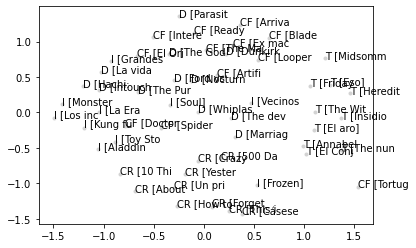

In [ ]:
plt.figure()
plt.plot(X[:,0],X[:,1],'.',color = 'lightgray')
for i in range(nmovies):
    plt.text(X[i,0],X[i,1],names[i][:10])
plt.show()

# Dendograma

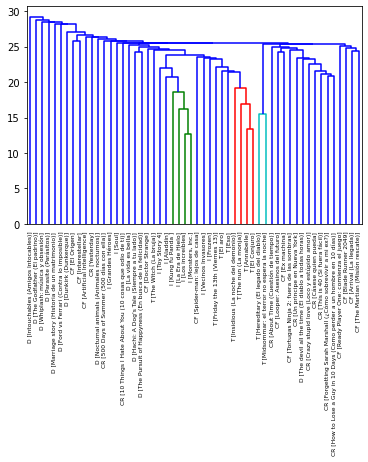

[23 26 39 19 27 38 30 42 40 29 32 20 43 41 21 18 31 18 25 24 33 45 22 44
 28 46 15  1 37 11 34 47  2 10  8 16  8  3 14 13 17 36 35  4  8  9  8  7
  5 12  6  5  5  5]


In [ ]:
Z = hierarchy.linkage(evaluations, 'single',)
dn = hierarchy.dendrogram(Z,labels=names)
plt.show()
g = hierarchy.fcluster(Z,t=20,criterion='distance')
print(g)

# Pruebas (Moodle)

In [ ]:
#49 52 30 19 4
usuario = 0
while usuario !=3:
  alreadyRecommended = []
  print("USUARIO",usuario+1)
  listaPelis = df.columns
  cuantasPelis = 0
  esta = 0
  likedMoviesIndex = []
  while cuantasPelis < 5:
    esta = 0
    pelicula = input("Dime una peli que te guste: ")
    for i in listaPelis:
      if i.find(pelicula)!=-1:
        index = np.where(dfdist.columns == i)[0]
        print(index)
        likedMoviesIndex.append(int(index))
        cuantasPelis+=1
        esta = 1
    if esta == 0:
      print("La película que buscas no está, consulta el catálogo")
  print(likedMoviesIndex)

  print("Estas son las recomendaciones para ti:")
  for i in likedMoviesIndex:
    movieNames = dfdist.columns
    distanceList = dfdist.values[:,i]
    
    distanceList = np.argsort(distanceList)
    movieNames = movieNames[distanceList]
    movieNames2 = movieNames[1:]
    recommended = []
    for j in movieNames2:
      if j not in alreadyRecommended:
        recommended.append(j)
        alreadyRecommended.append(j)
      if len(recommended) == 2:
        break;
      
    print("Recomendaciones de",dfdist.columns[i])
    print(pandas.DataFrame(recommended,columns={'Peliculas'}))
    print("_________________________________________________________")
    print()
  usuario+=1

USUARIO 1
Dime una peli que te guste: Frozen
[49]
Dime una peli que te guste: Los increíbles
[52]
Dime una peli que te guste: 10 cosas
[30]
Dime una peli que te guste: Cásese
[19]
Dime una peli que te guste: Un principe
[4]
[49, 52, 30, 19, 4]
Estas son las recomendaciones para ti:
Recomendaciones de I [Frozen]
               Peliculas
0  I [Vecinos Invasores]
1         T [El Conjuro]
_________________________________________________________

Recomendaciones de I [Los increíbles]
             Peliculas
0   I [Monsters, Inc.]
1  CF [Doctor Strange]
_________________________________________________________

Recomendaciones de CR [10 Things I Hate About You (10 cosas que odio de ti)]
                                           Peliculas
0  CR [How to Lose a Guy in 10 Days (Como perder ...
1      CR [Crazy stupid love (Loco y estúpido amor)]
_________________________________________________________

Recomendaciones de CR [Cásese quien pueda]
                          Peliculas
0  CR [This i

# Sistema de recomendación (mi idea)

In [ ]:
watchlist = []
movieNames = dfdist.columns
moviesToEvaluate = []
cuantasPelis = 0
esta = 0
likedMoviesIndex = []
while cuantasPelis < 5:
    esta = 0
    pelicula = input("Dime una peli que te guste: ")
    for i in listaPelis:
      if i.find(pelicula)!=-1:
        index = np.where(dfdist.columns == i)[0]
        print(index)
        likedMoviesIndex.append(int(index))
        cuantasPelis+=1
        esta = 1
    if esta == 0:
      print("La película que buscas no está, consulta el catálogo")
print(likedMoviesIndex)
print()
print()
print("Los valores para calificar son los siguientes:")
print("-1: No la he visto\n1: No la he visto y No me gustaría verla\n2: La vi y no me gustó\n3: La vi y me pareció normal\n4: No le he visto y me gustaría verla\n5: La vi y me gustó mucho\n6: La vi y es una de mis favoritas")
print()
for i in range(len(likedMoviesIndex)):
  movieNames = dfdist.columns
  print("Película",i+1,dfdist.columns[likedMoviesIndex[i]])
  print("¿Cómo la calificas? (Ingresa el número de las opciones mencionadas arriba)")
  score = int(input())
  distanceList = dfdist.values[:,likedMoviesIndex[i]]
  distanceList = np.argsort(distanceList)
  movieNames = movieNames[distanceList]
  movieNames2 = movieNames[1:]
  if score>4:
    recommended = movieNames2[:5]
    print("Según tu opinión, puedo recomendarte estas:")
    print(pandas.DataFrame(recommended,columns={'Peliculas'}))
    print()
    print("Si quieres agregar alguna a tu watchlist, introduce el número correspondiente\nDe lo contrario introduce -1")
    res = int(input())
    if res != -1 and res>=0 and res<5:
      watchlist.append(recommended[res])
  elif score<3 and score>-1 and score!=0:
    recommended = movieNames2[-5:]
    print("Parece ser que esa no te agradó,\npuedo recomendarte películas que son distintas a esa")
    print(pandas.DataFrame(recommended,columns={'Peliculas'}))
    print("Si quieres agregar alguna a tu playlist, introduce el número correspondiente\nDe lo contrario introduce -1")
    res = int(input())
    if res != -1 and res>=0 and res<5:
      watchlist.append(recommended[res])
  elif score == -1 or score == 4:
    print("¿Aún no la ves? ¿Quieres agregarla a tu watchlist?")
    res = input("S/N")
    if res == 's' or res=='S':
      watchlist.append(dfdist.columns[likedMoviesIndex[i]])
  else:
    print("Ingresa una opción válida")
  print("____________________________________________________________")
  print()

wL = pandas.DataFrame(watchlist,index=np.arange(len(watchlist))+1,columns={'Watchlist: Películas'})
wL.to_csv('/content/drive/MyDrive/Colab Notebooks/watchlist.csv')
wL




    




Dime una peli que te guste: El origen
La película que buscas no está, consulta el catálogo
Dime una peli que te guste: El Origen
[27]
Dime una peli que te guste: Arrival
[6]
Dime una peli que te guste: Interestellar
[32]
Dime una peli que te guste: Animales nocturnos
[5]
Dime una peli que te guste: El padrino
[25]
[27, 6, 32, 5, 25]


Los valores para calificar son los siguientes:
-1: No la he visto
1: No la he visto y No me gustaría verla
2: La vi y no me gustó
3: La vi y me pareció normal
4: No le he visto y me gustaría verla
5: La vi y me gustó mucho
6: La vi y es una de mis favoritas

Película 1 CF [El Origen]
¿Cómo la calificas? (Ingresa el número de las opciones mencionadas arriba)
6
Según tu opinión, puedo recomendarte estas:
                                    Peliculas
0              D [The Godfather (El padrino)]
1  D [Nocturnal animals (Animales nocturnos)]
2                    D [Parasite (Parásitos)]
3                             CF [Ex machina]
4   D [Ford vs Ferrari (Con

,Watchlist: Películas
1,CF [Ready Player One: comienza el juego]
2,CF [Artificial Intelligence]
3,CF [Looper: Asesinos del futuro]
